# SuW 2024 - 09 

https://ned.ipac.caltech.edu/help/cosmology_calc.html


- [Star HR2933 p.9](#star-hr2933)
- [Exercises (Schwarzschild radius) p.24](#schwarzschild-radius)

In [9]:
import math

import matplotlib.pyplot as plt
import numpy as np


## Star HR2933


- Parallaxes
- abs./rel. mag
- DR3 

Spectral type: F0Ib  


[Simbad](http://simbad.cds.unistra.fr/simbad/sim-basic?Ident=HR2933&submit=SIMBAD+search)  
[Aladin](http://aladin.cds.unistra.fr/AladinLite/)  
[CDS](http://cdsportal.u-strasbg.fr/?target=HD%20%2061227%20)  


1. Measured: parallaxes $\phi = 0.5937$ mas  
    - -> distance in pc
1. Measured: Relative magnitude: $m = 6.361$
    - [Photometric system](https://en.wikipedia.org/wiki/Photometric_system#Photometric_letters)  
    - -> absolute magnitude M


### Parallaxes

$$
\begin{align}
d &= \frac{AU}{\tan(\phi)} \quad \longrightarrow \quad \phi << 1 \quad \Longrightarrow \quad \tan(\phi)\approx \phi    \\
d &= \frac{1}{\phi}, \quad \text{for d in parsec}              \\
\end{align}
$$

### Distance Modulus
d... distance in parsec

$$
\begin{align}
m - M = 5 \log_{10} \left( d \right) - 5\\
\end{align}
$$

In [10]:
# Arcmin / Arcsec

arcmin = math.pi / (180 * 60)
arcsec = math.pi / (180 * 60 * 60)

print(f"arcmin: {arcmin:.15f}")
print(f"arcsec: {arcsec:.15f}")


# Rad / Deg

print(np.radians(360))
print(2 * math.pi)

arcmin: 0.000290888208666
arcsec: 0.000004848136811
6.283185307179586
6.283185307179586


In [11]:
# Distance of HR2933

hr2933_paralax = 0.5937 * 10 ** (-3)  # hr2933_paralax ... Parallaxes (mas)

hr2933_distance_pc = 1 / hr2933_paralax

print(f"Distance of HR2933: {hr2933_distance_pc:.3f}[pc], {hr2933_distance_pc*3.26:.3f}[ly]")

Distance of HR2933: 1684.352[pc], 5490.989[ly]


In [12]:
# Absolute Magnitude

hr2933_rel_mag = 6.361

hr2933_abs_mag = -(5 * np.log10(hr2933_distance_pc) - 5 - hr2933_rel_mag)

print(hr2933_abs_mag)


-4.771164755369708


In [13]:
# Comparison Sun

sun_abs_mag = 4.8

mag_steps = 100 ** (1 / 5)

mag_diff = sun_abs_mag - hr2933_abs_mag
print(mag_steps**mag_diff)

6736.989991257873


## Schwarzschild radius

1. Derive schwarzschild radius by escape velocity:

$$
\begin{align}
\text{Escape velocity:} \quad v_{esc} &= \sqrt{\frac{2GM}{r}} \quad \text{ for $v_{esc} = c$ (is )speed of light), leads to } \quad \\  
\text{Schwarzschild radius:} \quad R_s &= \frac{2GM}{c^2} \\
\end{align} \\
$$

2. Compactness C of a star

    - $C = \frac{M}{R} \quad \text{with}$
    - $M$... mass
    - $R$... radius

3. Astrophysical compactness

    - $C = \frac{R_s}{R} \quad \text{with}$
    - $R_s$... Schwarzschild radius
    - $R$... radius

$$
\begin{align}
C = \frac{R_s}{R} \quad \Rightarrow \quad  C = \frac{\frac{2GM}{c^2}}{R} \quad \Rightarrow \quad C &= \frac{2GM}{Rc^2} \quad \\  
\text{the factor 2 is ignored which leads to: } \quad C &= \frac{GM}{Rc^2}
\end{align} \\
$$    

In [14]:
# Constants

G = 6.67 * 10 ** (-11)  # Gravitational constant in m^3*kg^-1*s^-2
c = 3 * 10**8  # Speed of light in m/s
sun_mass = 2 * 10**30  # Mass of the sun in kg
sun_radius = 696000 * 10**3  # Radius of the sun in m
earth_mass = 6 * 10**24  # Mass of earth in kg
earth_radius = 6380 * 10**3  # Radius of earth in m
white_dwarf_mass = sun_mass  # Mass of a white dwarf example
white_dwarf_radius = 6000 * 10**3  # Radius of a white dwarf example
neutron_star_mass = 4.2 * 10**30  # Mass of a neutron star example in kg
neutron_star_radius = 20 * 10**3  # Radius of a neutron star example in m

# 1. Schwarzschild radius function


def schwarzschild_radius(m: float) -> float:
    return (2 * G * m) / (c**2)


def compactness(m: float, r: float) -> float:
    """
    arguments: mass m / sschwarzschild radius r
    """
    return (G * m) / (r * c**2)


In [15]:
# 2. Schwarzschild radius examples

M1_mass = 5 * sun_mass
M2_mass = 50 * 10**6 * sun_mass


print(f"Schwarzschild radius for earth : {schwarzschild_radius(earth_mass)*10**3:.3f} mm")
print(f"Schwarzschild radius for sun : {schwarzschild_radius(sun_mass):.3f} m")
print(f"Schwarzschild radius for 5 sun masses: {schwarzschild_radius(M1_mass):.3e} m")
print(f"Schwarzschild radius for 50 million sun masses: {schwarzschild_radius(M2_mass):.3e} m")
print()

# 3. Compactness

C_sun = sun_mass / (sun_radius / 10**3)
C_earth = earth_mass / (earth_radius / 10**3)
C_white_dwarf = white_dwarf_mass / (white_dwarf_radius / 10**3)
C_neutron_star = neutron_star_mass / (neutron_star_radius / 10**3)
C_M1 = M1_mass / (schwarzschild_radius(M1_mass) / 10**3)
C_M2 = M2_mass / (schwarzschild_radius(M2_mass) / 10**3)

print(f"Compactness of the sun: {C_sun}")
print(f"Compactness of the earth: {C_earth/C_sun} [C_sun]")
print(f"Compactness of the earth: {C_earth/C_sun:.3e} [C_sun]")
print(f"Compactness of a white dwarf: {C_white_dwarf/C_sun} [C_sun]")
print(f"Compactness of a white dwarf: {C_white_dwarf/C_sun:.3e} [C_sun]")
print(f"Compactness of a neutron star: {C_neutron_star/C_sun:.3e} [C_sun]")
print(f"Compactness of a M1 (5 sun masses): {C_M1/C_sun:.3e} [C_sun]")
print(f"Compactness of a M2 (50 million sun masses): {C_M2/C_sun:.3e} [C_sun]")
print()


# 3. Compactness

print(f"Compactness of sun: {compactness(sun_mass, sun_radius)}")
print(f"Compactness of 20 sun masses: {compactness(20*sun_mass, sun_radius)}")


Schwarzschild radius for earth : 8.893 mm
Schwarzschild radius for sun : 2964.444 m
Schwarzschild radius for 5 sun masses: 1.482e+04 m
Schwarzschild radius for 50 million sun masses: 1.482e+11 m

Compactness of the sun: 2.873563218390805e+24
Compactness of the earth: 0.0003272727272727272 [C_sun]
Compactness of the earth: 3.273e-04 [C_sun]
Compactness of a white dwarf: 115.99999999999999 [C_sun]
Compactness of a white dwarf: 1.160e+02 [C_sun]
Compactness of a neutron star: 7.308e+04 [C_sun]
Compactness of a M1 (5 sun masses): 2.348e+05 [C_sun]
Compactness of a M2 (50 million sun masses): 2.348e+05 [C_sun]

Compactness of sun: 2.1296296296296294e-06
Compactness of 20 sun masses: 4.259259259259259e-05


## Tangens Approximation

Angle: 0.000000000000000 radians, Tangent: 0.000000000000000, Difference: 0.000000000000000
Angle: 0.000010101010101 radians, Tangent: 0.000010101010101, Difference: -0.000000000000000
Angle: 0.000020202020202 radians, Tangent: 0.000020202020205, Difference: -0.000000000000003
Angle: 0.000030303030303 radians, Tangent: 0.000030303030312, Difference: -0.000000000000009
Angle: 0.000040404040404 radians, Tangent: 0.000040404040426, Difference: -0.000000000000022
Angle: 0.000050505050505 radians, Tangent: 0.000050505050548, Difference: -0.000000000000043
Angle: 0.000060606060606 radians, Tangent: 0.000060606060680, Difference: -0.000000000000074
Angle: 0.000070707070707 radians, Tangent: 0.000070707070825, Difference: -0.000000000000118
Angle: 0.000080808080808 radians, Tangent: 0.000080808080984, Difference: -0.000000000000176
Angle: 0.000090909090909 radians, Tangent: 0.000090909091160, Difference: -0.000000000000250
Angle: 0.000101010101010 radians, Tangent: 0.000101010101354, Differenc

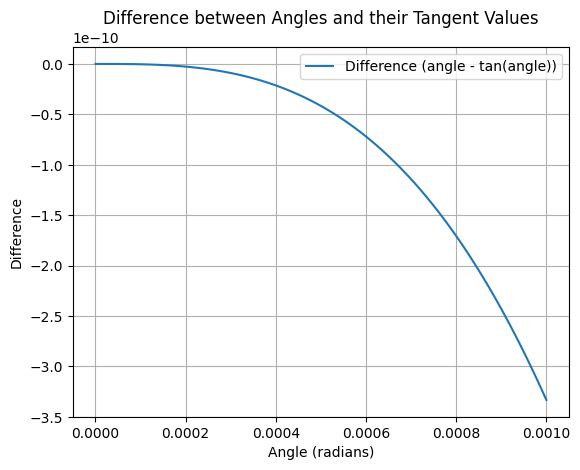

In [16]:
# Define the range of angles
angles = np.linspace(0, 0.001, 100)

# Calculate the tangent values
tangent_values = np.tan(angles)

# Calculate the differences
differences = angles - tangent_values

# Print the results with 15 decimal places
for angle, tangent, difference in zip(angles, tangent_values, differences):
    print(f"Angle: {angle:.15f} radians, Tangent: {tangent:.15f}, Difference: {difference:.15f}")

# Plot the differences
plt.plot(angles, differences, label="Difference (angle - tan(angle))")
plt.xlabel("Angle (radians)")
plt.ylabel("Difference")
plt.title("Difference between Angles and their Tangent Values")
plt.legend()
plt.grid(True)
plt.show()